<a href="https://colab.research.google.com/github/dorahs71/ml-course/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

# pandas 兩種資料型態：DataFrame(2D 有行列)、Series(1D)

datas = pd.DataFrame(iris["data"], columns=iris["feature_names"]) #幫 iris data 加上欄位名稱 feature name

datas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 分群沒有標準答案可以參考
-> [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

不用先切分 train & test data

In [15]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(datas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
cluster.cluster_centers_ #算出中心
#sepal length (cm),	sepal width (cm),	petal length (cm),	petal width (cm) 四個值的中心點

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [17]:
cluster.labels_

#算出中心後，各點和中心的距離

#label0 就表示離 [5.9016129 , 2.7483871 , 4.39354839, 1.43387097] 比較近
#label1 就表示離 [5.006     , 3.428     , 1.462     , 0.246     ] 比較近
#label2 就表示離 [6.85      , 3.07368421, 5.74210526, 2.07105263] 比較近

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(datas, cluster.labels_)
for testk in range(2, 10): #k=2~9，共九群
  cluster = KMeans(n_clusters=testk)
  cluster.fit(datas)
  score = silhouette_score(datas, cluster.labels_) #判斷親疏程度
  print(testk, score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

2 0.6810461692117462
3 0.5528190123564095
4 0.49805050499728737
5 0.48874888709310566
6 0.3599431166074401
7 0.3588294450965685
8 0.35974549238457626
9 0.3296476359511652


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

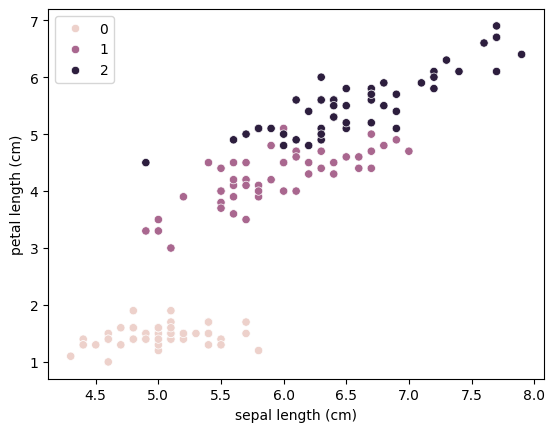

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = datas["sepal length (cm)"],
                y = datas["petal length (cm)"],
                hue = iris["target"]
                ) #散佈圖，x & y 都是連續的